# Exploratory data analysis

# Introduction

In this notebook we explore the custom data set built for the prediction of football matches using player ratings from the EA FIFA videogame.

The analysis covers:
- Characterization of the dataset: Number of data points available, distribution of the classes, statistical measurements for the attributes.
- Study of the distribution of the different attributes.
- Study of the correlation between attribtues.
- Selection of relevant attribtues.

# Problem understanding

**Goal:**
- Predict the winner of a football match to be either the local team, the visit team or a draw.

**Background:**
- With the increasing availability of data, accurately predicting the outcome of a match has become a topic of great interest. Accurately predicting the outcome can help create successful betting strategies and aid the game's actors in better understanding the factors contributing to their success.
- We insvestigate the extent to which video game data can be used as a reliable source for creating relevant prediction models in football.
- A study estimated that when attempting to solve this problem, the accuracy results among different works in the literature is roughly below 60% making it a very challenging problem.

**Data set creation:**
- The data set used in this notebook is a custom data set built from the ratings of the players in the EA FIFA 2018 video game and the knowledge of the team formation and match outcome for matches played during 2018 for five different tournaments. A description of the created attributes is given in this notebook.

## Pre-requisites (import libraries and setup the environment)

Download the data set

In [ ]:
# Setup the environment
import os

local_folder = 'Sandbox'
!git clone https://github.com/omarsilloMG/CS5056_FPA.git {local_folder} > /dev/null 2>&1;

os.chdir("Sandbox")

Load the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Characterization of the data set

Load the data set into a dataframe

In [ ]:
data_folder       = 'data/'
database_filename = 'custom_database.csv'

df = pd.read_csv(data_folder + database_filename)

Understand the attribute data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   L_AVG_OVR_GK  917 non-null    float64
 1   L_AVG_OVR_DF  917 non-null    float64
 2   L_NUM_DF      917 non-null    int64  
 3   L_AVG_OVR_MD  917 non-null    float64
 4   L_NUM_MD      917 non-null    int64  
 5   L_AVG_OVR_FW  894 non-null    float64
 6   L_NUM_FW      917 non-null    int64  
 7   V_AVG_OVR_GK  915 non-null    float64
 8   V_AVG_OVR_DF  917 non-null    float64
 9   V_NUM_DF      917 non-null    int64  
 10  V_AVG_OVR_MD  917 non-null    float64
 11  V_NUM_MD      917 non-null    int64  
 12  V_AVG_OVR_FW  892 non-null    float64
 13  V_NUM_FW      917 non-null    int64  
 14  WINNER        917 non-null    object 
dtypes: float64(8), int64(6), object(1)
memory usage: 107.6+ KB


From the table above, we observe that all attributes are numeric except for the class and that we have 917 observations.

Below there is a description of the different attributes:


| Attribute | Description |
|----------|----------|
| L_AVG_OVR_GK | Overall rating of the goalkeeper (local team). |
| L_AVG_OVR_DF | Average overall rating of defensive team players (local team). |
| L_NUM_DF | Number of defensive players for the team at match start (local team). |
| L_AVG_OVR_MD | Average overall rating of midfielder team players (local team). |
| L_NUM_MD | Number of midfielder players for the team at match start (local team). |
| L_AVG_OVR_FW | Average overall rating of offensive team players (local team). |
| L_NUM_FW |Number of offensive players for the team at match start (local team). |
| V_AVG_OVR_GK | Overall rating of the goalkeeper (visit team). |
| V_AVG_OVR_DF | Average overall rating of defensive team players (visit team). |
| V_NUM_DF | Number of defensive players for the team at match start (visit team). |
| V_AVG_OVR_MD | Average overall rating of midfielder team players (visit team). |
| V_NUM_MD | Number of midfielder players for the team at match start (visit team). |
| V_AVG_OVR_FW | Average overall rating of offensive team players (visit team). |
| V_NUM_FW | Number of offensive players for the team at match start (visit team). |
| WINNER | Winner of the match (either visit, local, or draw) |




Take a look at some of the data

In [ ]:
df.head()

,L_AVG_OVR_GK,L_AVG_OVR_DF,L_NUM_DF,L_AVG_OVR_MD,L_NUM_MD,L_AVG_OVR_FW,L_NUM_FW,V_AVG_OVR_GK,V_AVG_OVR_DF,V_NUM_DF,V_AVG_OVR_MD,V_NUM_MD,V_AVG_OVR_FW,V_NUM_FW,WINNER
0,73.0,76.00,4,75.250000,5,75.00,1,82.0,74.500000,4,72.000000,4,73.0,2,VISIT
1,72.0,70.75,4,77.000000,6,NaN,0,79.0,76.250000,4,76.333333,4,77.5,2,LOCAL
2,75.0,74.00,5,74.750000,4,76.00,1,78.0,79.000000,4,81.250000,4,86.5,2,VISIT
3,80.0,77.00,4,81.500000,2,80.25,4,77.0,74.333333,4,74.400000,5,77.0,1,LOCAL
4,81.0,80.00,5,75.666667,3,84.50,2,79.0,75.750000,4,78.000000,3,78.0,3,LOCAL


Get an overview of the data through the use of boxplots

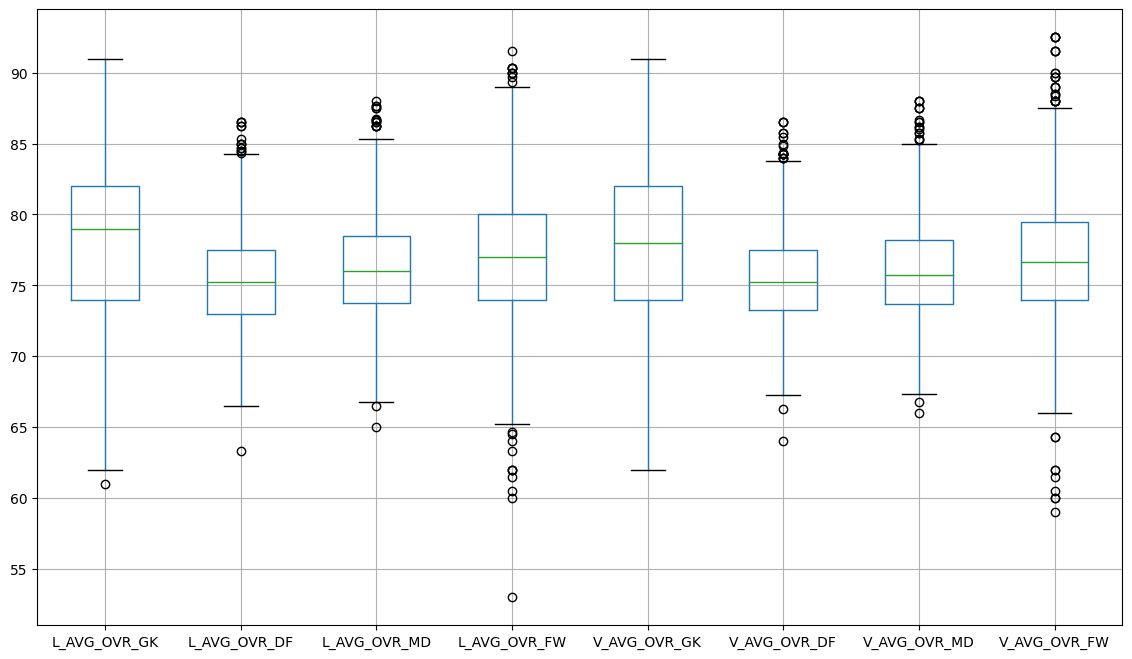

In [ ]:
# select columns that contain the string 'AVG' in their column name
df_selected = df.filter(regex='AVG')

# plot boxplots of the selected columns
plt.figure(figsize=(14,8))
df_selected.boxplot()
plt.show()

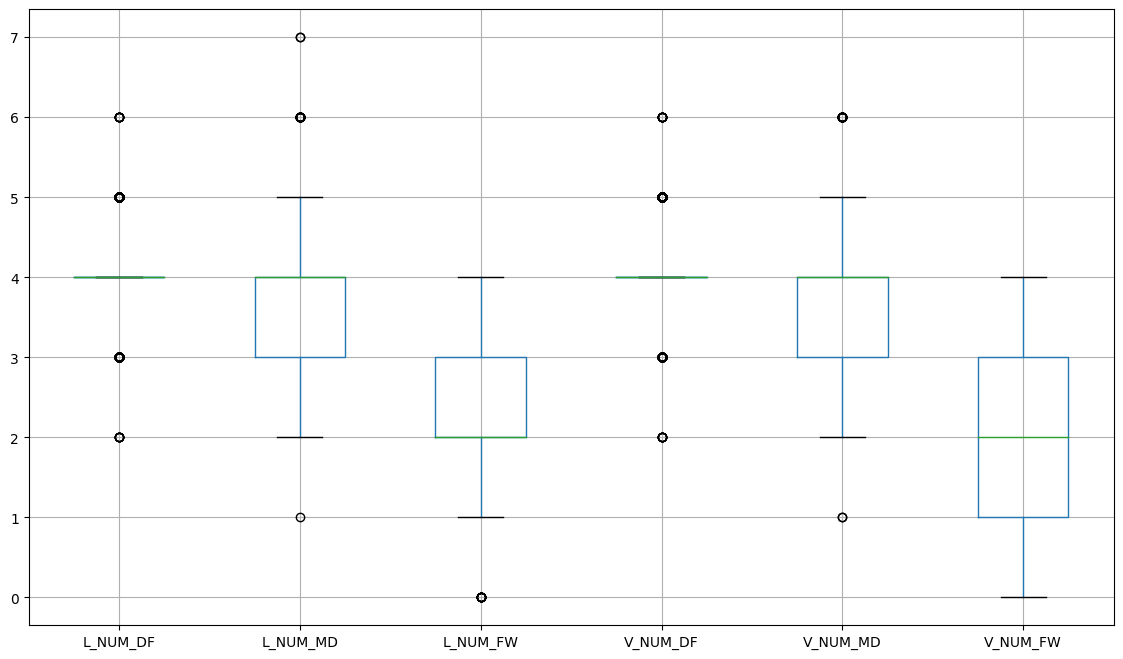

In [ ]:
# select columns that contain the string 'AVG' in their column name
df_selected = df.filter(regex='NUM')

# plot boxplots of the selected columns
plt.figure(figsize=(14,8))
df_selected.boxplot()
plt.show()

Look for attributes with missing values in the data set

In [ ]:
df.isnull().sum()

L_AVG_OVR_GK     0
L_AVG_OVR_DF     0
L_NUM_DF         0
L_AVG_OVR_MD     0
L_NUM_MD         0
L_AVG_OVR_FW    23
L_NUM_FW         0
V_AVG_OVR_GK     2
V_AVG_OVR_DF     0
V_NUM_DF         0
V_AVG_OVR_MD     0
V_NUM_MD         0
V_AVG_OVR_FW    25
V_NUM_FW         0
WINNER           0
dtype: int64

We observe that the dataset has three attributes with missing values and at most 25 missing values for a given attribute. The total number of observations with missing data is ~5.4% which is a small percentage.

To avoid having to guess the missing values and because the number of missing data is small, we drop observations with missing data.

In [ ]:
df = df.dropna()

Now we observe the distribution of the classes

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
counts = y.value_counts(normalize=True)*100

print(counts)

LOCAL    45.444060
VISIT    29.065744
DRAW     25.490196
Name: WINNER, dtype: float64


From this inspection, we observe that there exists a local advantage as most of the games are won by the local team.

# Attribute overview

## Distribution

We create a custom plot to show the distribution of variables together with their class to attempt to visually see if the values of a variable are related to the class.

In [ ]:
def plot_class_distribution(df, variable, class_column, bins=10):
    # Create a binned version of the variable
    binned_variable = pd.cut(df[variable], bins=bins)
    
    # Plot the countplot
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=binned_variable, hue=class_column, data=df)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.legend(title=class_column)
    plt.show()

### Local team attributes

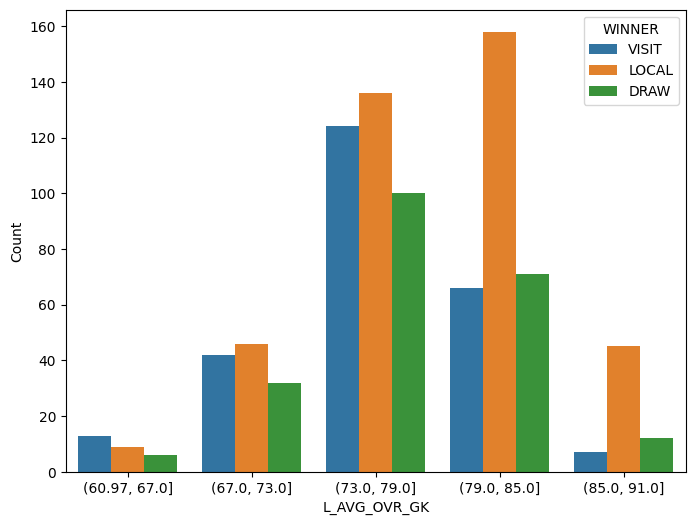

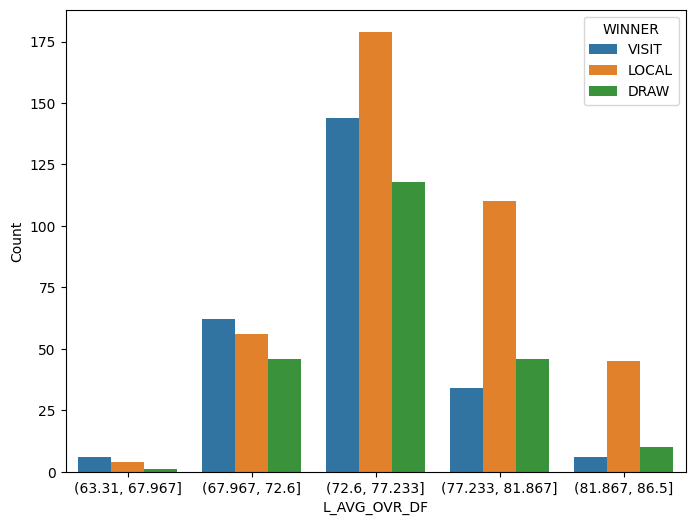

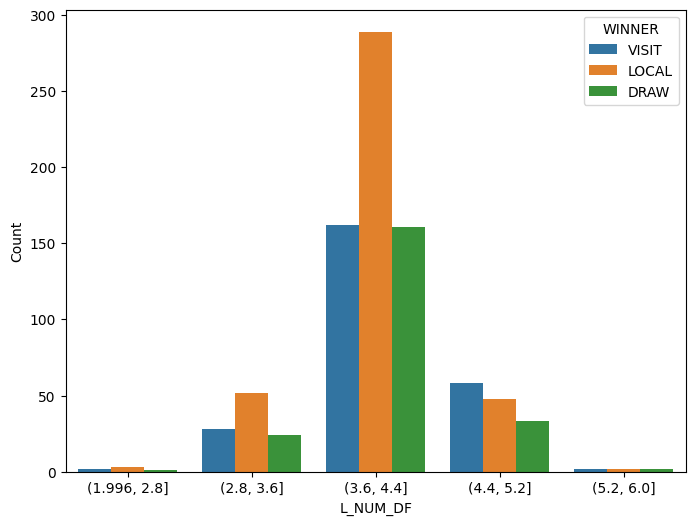

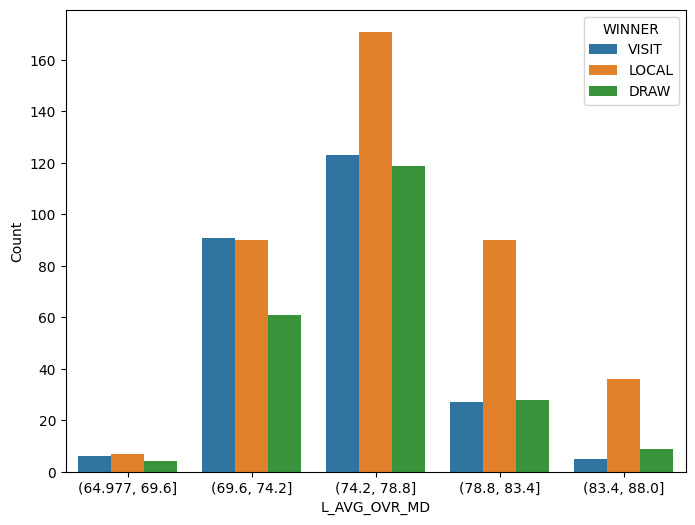

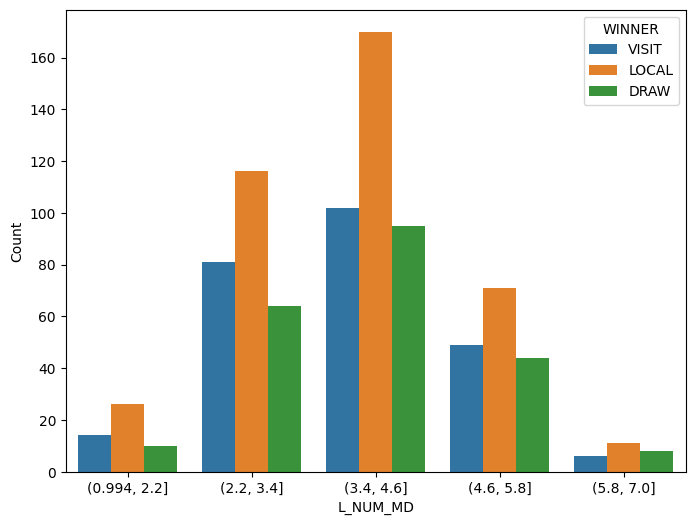

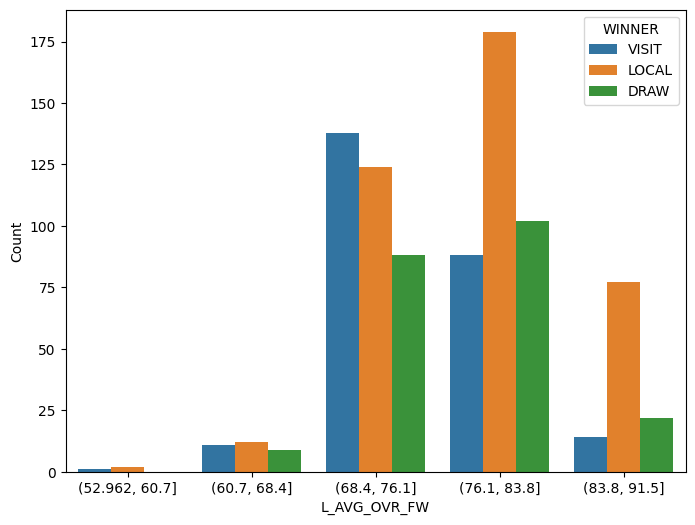

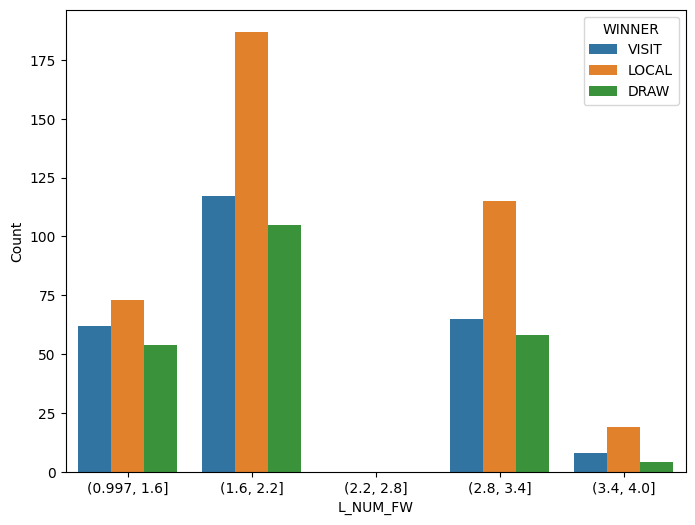

In [ ]:
local_team_variables = df.filter(like='L_').columns

# Plot each variable
for var in local_team_variables:
    plot_class_distribution(df, var, 'WINNER', bins=5)

From the plots we observe that it appears to be a relationship between large values of the local team ratings and the proportion of games won by the local team. Suggesting that high ratings for the local team might lead to increased chances of winning the game. This behavior was not observed for the number of players in each group (from the local team) suggesting that these variables might not be very useful for predicting the match outcome.

### Visit team attributes

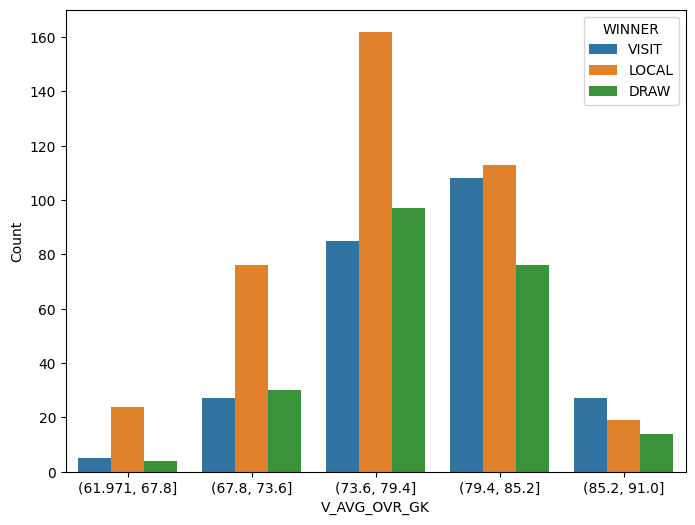

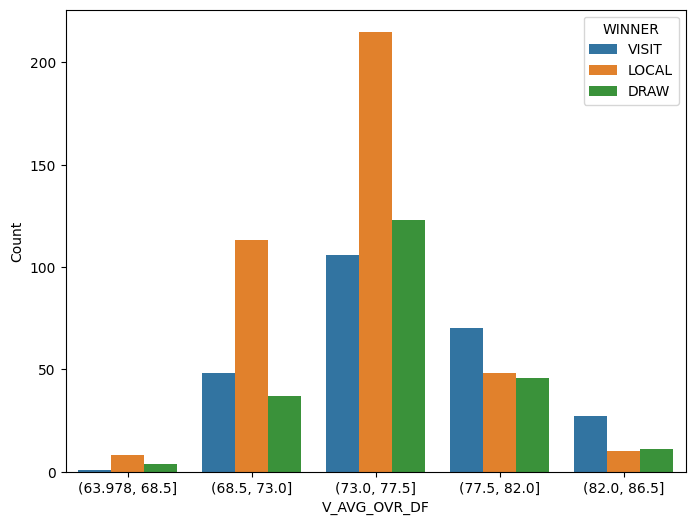

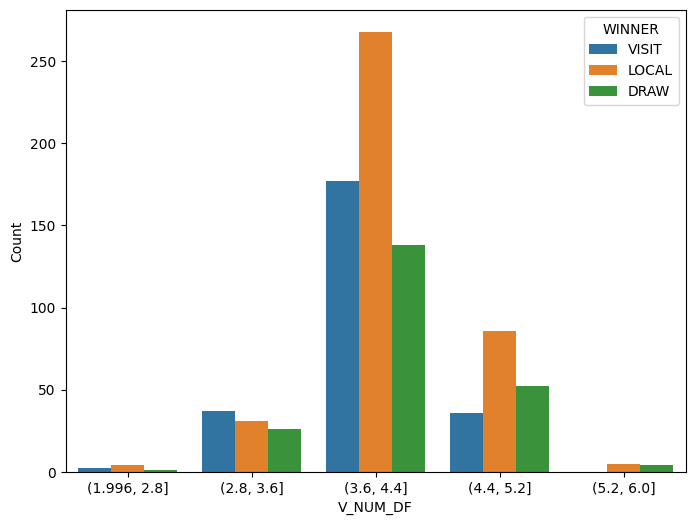

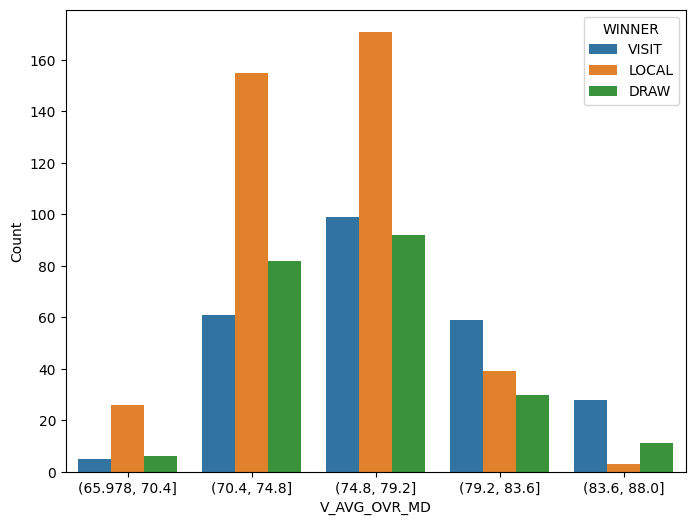

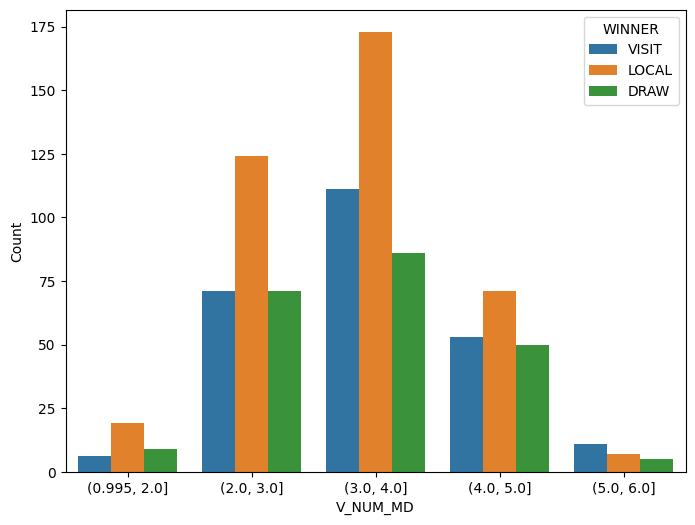

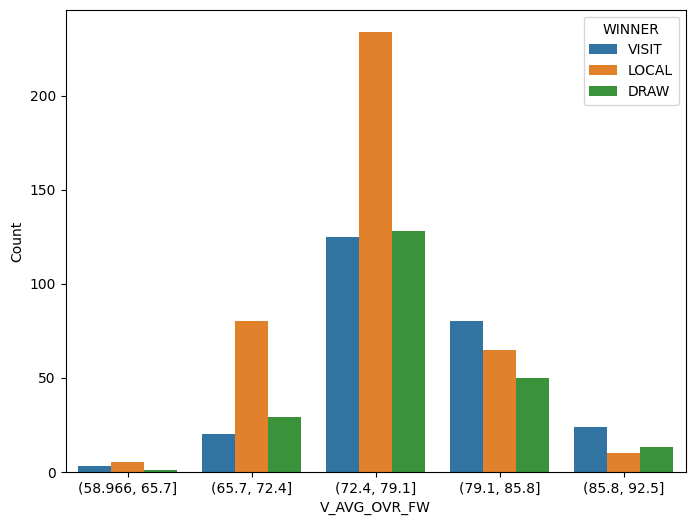

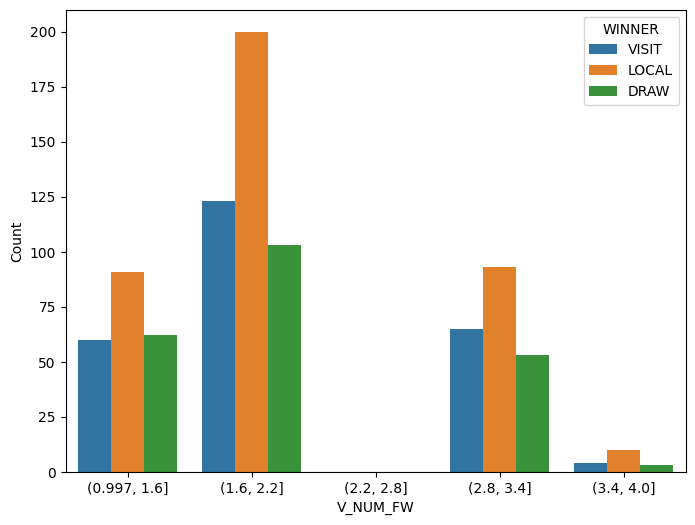

In [ ]:
visit_team_variables = df.filter(like='V_').columns

# Plot each variable
for var in visit_team_variables:
    plot_class_distribution(df, var, 'WINNER', bins=5)

The plots show that when the visiting team has low ratings, the local team tends to win more games. But it's not as clear whether the opposite is true. It's hard to say if the visiting team with high ratings has increased chances of winning. This indicates that it appears to be somewhat easy to predict that the local team will win but not so easy to predict that the visit team will win or that a match will be drawn.

## Correlation

In this section we study the correlation between the variables

In [ ]:
# Create a new dataframe with only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

<Axes: >

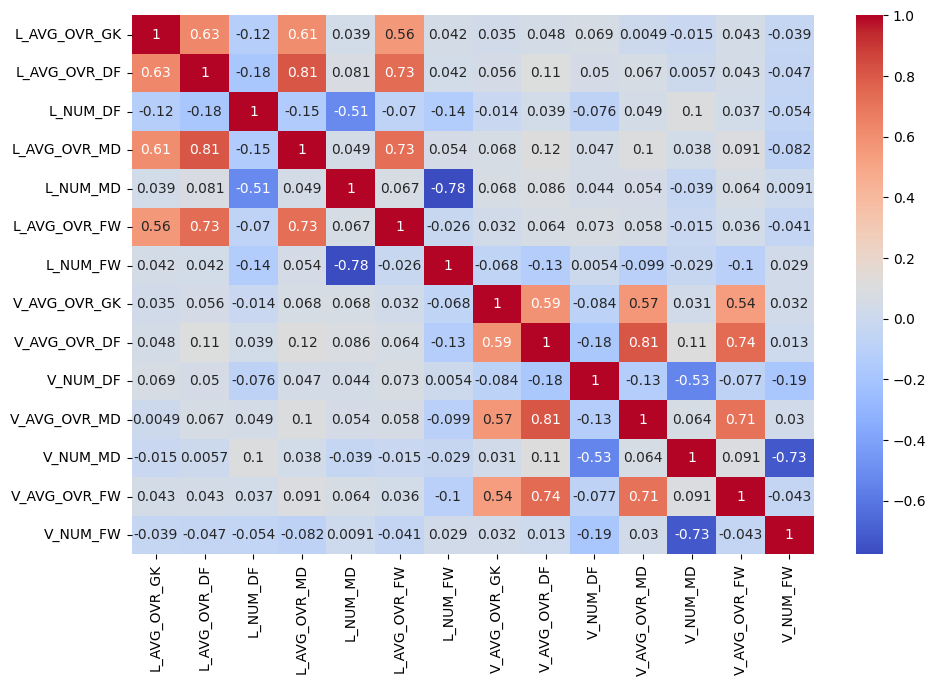

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Based on the correlation matrix above, we investigate strong correlations using scatterplots.

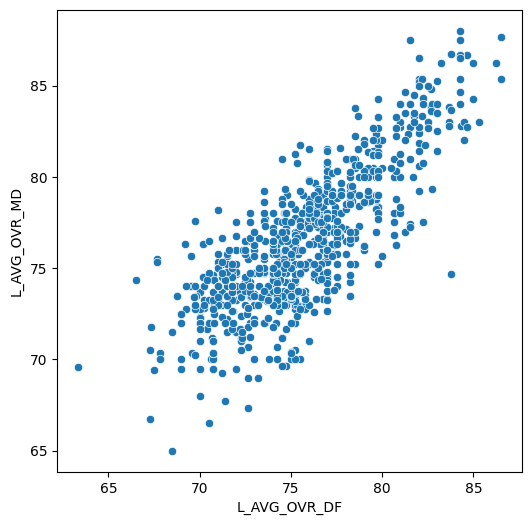

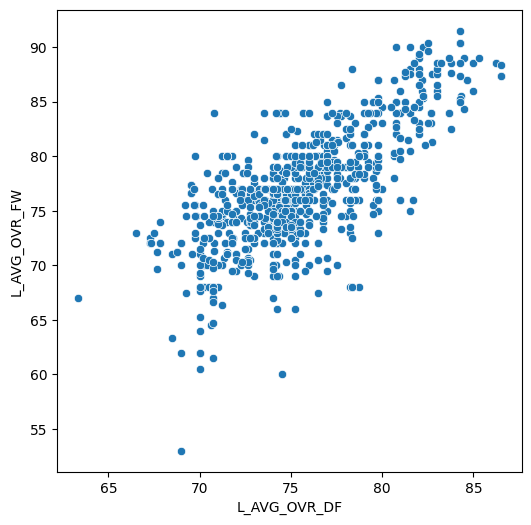

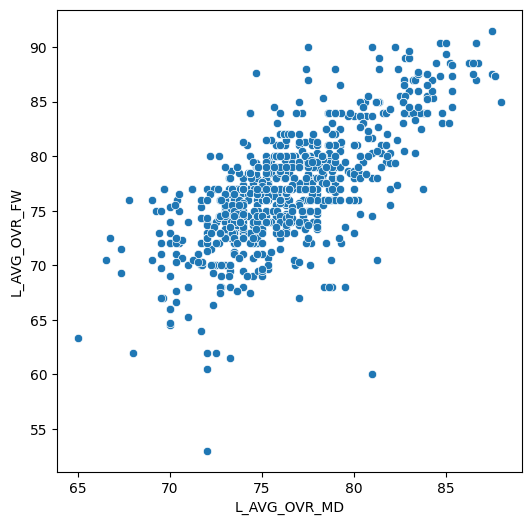

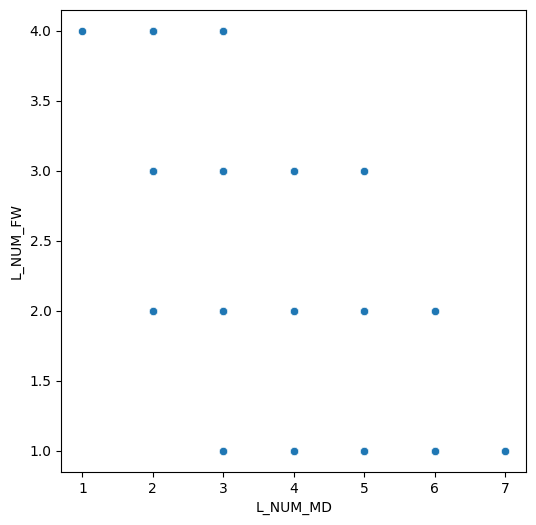

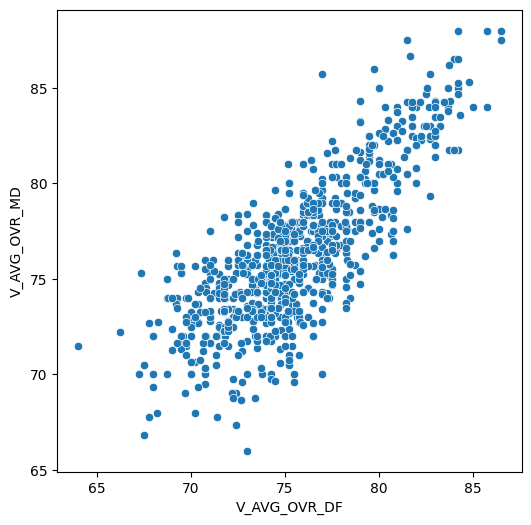

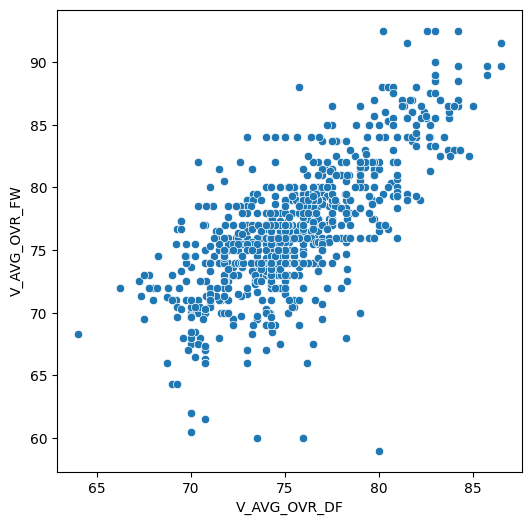

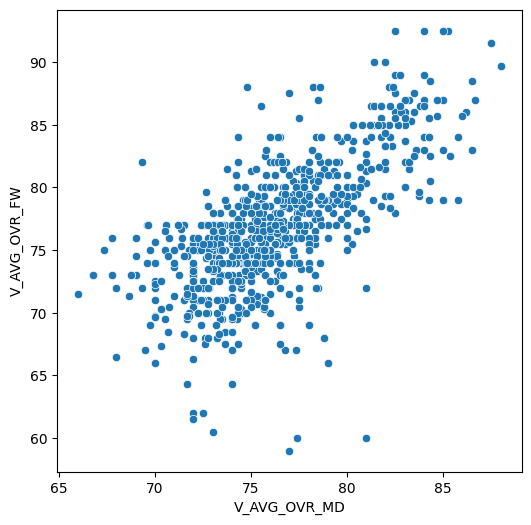

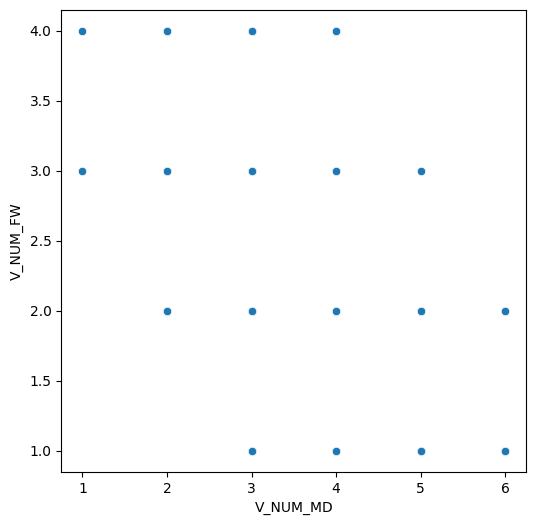

In [ ]:
# Find all the variable pairs with correlation greater than 0.8
corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])
              for i in range(len(corr_matrix.columns))
              for j in range(i+1, len(corr_matrix.columns))
              if np.abs(corr_matrix.iloc[i,j]) > 0.7]

# Create scatter plots for each pair of correlated variables
for pair in corr_pairs:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=pair[0], y=pair[1], data=df)

From the plots above, we observe that it is common for teams to have overall similar characteristics among their groups. That is, a team with a strong defensive also appears to have a strong midfield and offensive. Furthermore, a negative correlation between the number of midfielders and the number of offensive players is found which is expected since we have a maximum of 11 players in the field.

## Feature selection

In this section we perform Sequential Feature Selection to identify relevant features from our dataset that can help us solve the classification problem.

Split the data set into training and test sets

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('WINNER', axis=1)
y = df['WINNER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# create a min-max scaler and scale the training data
scaler = StandardScaler()

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

Create a classification model used as a reference for the feature selection process

In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train the random forest classifier on the training data
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Obtain the feature importances from the random forest model

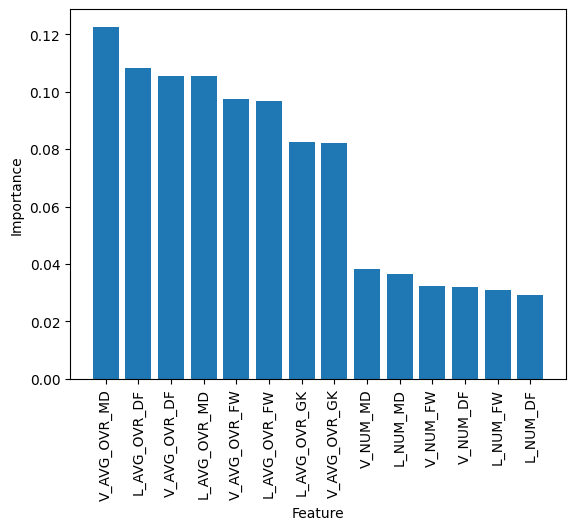

In [ ]:
# get the feature importances and rank them
importances = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# create a bar chart of the feature importances
plt.bar(importances.index, importances.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Select the most important features



In [ ]:
from sklearn.feature_selection import SelectFromModel

# select the features with importance greater than or equal to 0.2
selector = SelectFromModel(rfc, threshold=0.04)

# print the selected features
print('Selected features:', X.columns[selector.get_support()])

Selected features: Index(['L_AVG_OVR_GK', 'L_AVG_OVR_DF', 'L_AVG_OVR_MD', 'L_AVG_OVR_FW',
       'V_AVG_OVR_GK', 'V_AVG_OVR_DF', 'V_AVG_OVR_MD', 'V_AVG_OVR_FW'],
      dtype='object')


Train a classifier using the selected features

In [ ]:
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected  = selector.transform(X_test_scaled)

# train a new random forest classifier on the selected features
rfc_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_selected.fit(X_train_selected, y_train)

# evaluate the performance of the random forest classifier on the testing data
accuracy = rfc_selected.score(X_test_selected, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5229885057471264


We compare the accuracy to the accuracy of what a naive classifier that always predicts the local team as the winner would yield.

In [ ]:
counts = y_test.value_counts(normalize=True)*100

print(counts)

LOCAL    45.402299
VISIT    29.310345
DRAW     25.287356
Name: WINNER, dtype: float64


Based on the values above, we observe that the classifier based on the video game features improves ~7% when compared to the naive classifier.

Finally, we plot the confusion matrix

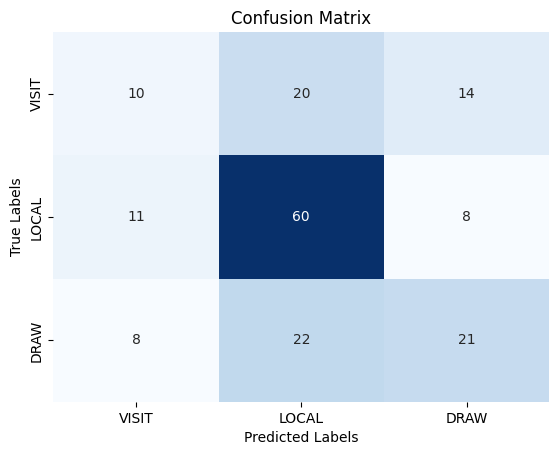

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
y_pred = rfc_selected.predict(X_test_selected)
cm     = confusion_matrix(y_test, y_pred)

class_names = df['WINNER'].unique()

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# set the x and y axis labels and the title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()